## Importing Libraries

In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Dataset Link: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset

## Data Preprocessing

### Training Image Preprocessing

In [6]:
training_set = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\There\\OneDrive\\Desktop\\Krishi Vaidhya\\IIIT Sri City\\Plant_Disease_Prediction-20250228T074143Z-001\\Plant_Disease_Prediction\\Plant_Disease_Dataset\\Plant_Disease_Dataset\\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 14824 files belonging to 38 classes.


### Validation Image Preprocessing

In [7]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\There\\OneDrive\\Desktop\\Krishi Vaidhya\\IIIT Sri City\\Plant_Disease_Prediction-20250228T074143Z-001\\Plant_Disease_Prediction\\Plant_Disease_Dataset\\Plant_Disease_Dataset\\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3750 files belonging to 38 classes.


In [8]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [9]:
for x,y in training_set:
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[162.25 149.25 156.25]
   [154.5  141.5  148.5 ]
   [158.   145.   152.  ]
   ...
   [156.5  142.5  142.5 ]
   [156.5  142.5  142.5 ]
   [145.75 131.75 131.75]]

  [[161.   148.   155.  ]
   [162.   149.   156.  ]
   [156.75 143.75 150.75]
   ...
   [161.25 147.25 147.25]
   [155.25 141.25 141.25]
   [163.5  149.5  149.5 ]]

  [[158.25 145.25 152.25]
   [158.5  145.5  152.5 ]
   [159.5  146.5  153.5 ]
   ...
   [163.25 149.25 149.25]
   [161.75 147.75 147.75]
   [153.5  139.5  139.5 ]]

  ...

  [[198.   189.   194.  ]
   [209.75 200.75 205.75]
   [205.75 196.75 201.75]
   ...
   [181.   170.   174.  ]
   [183.   172.   176.  ]
   [182.   171.   175.  ]]

  [[208.25 199.25 204.25]
   [202.25 193.25 198.25]
   [206.25 197.25 202.25]
   ...
   [182.25 171.25 175.25]
   [186.   175.   179.  ]
   [177.25 166.25 170.25]]

  [[204.25 195.25 200.25]
   [202.25 193.25 198.25]
   [205.25 196.25 201.25]
   ...
   [183.5  172.5  176.5 ]
   [190.   179.   183.  ]
   [181.   170.   17

### To avoid Overshooting
1. Choose small learning rate default 0.001 we are taking 0.0001
2. There may be chance of Underfitting, so increase number of neuron
3. Add more Convolution layer to extract more feature from images there may be possibilty that model unable to capture relevant feature or model is confusing due to lack of feature so feed with more feature

## Building Model

In [10]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [11]:
model = Sequential()

In [12]:
## Building Convolution Layer

In [13]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

C:\Users\There\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [15]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [16]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [17]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [18]:
model.add(Dropout(0.25)) # To avoid Overfitting

In [19]:
model.add(Flatten())

In [20]:
model.add(Dense(units=1500,activation='relu'))

In [21]:
model.add(Dropout(0.4))

In [22]:
#Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [23]:
import tensorflow as tf

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Use new Adam
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [24]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [25]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 288s 613ms/step - accuracy: 0.4440 - loss: 1.8579 - val_accuracy: 0.8285 - val_loss: 0.5302
Epoch 2/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 289s 624ms/step - accuracy: 0.8105 - loss: 0.5844 - val_accuracy: 0.8472 - val_loss: 0.4659
Epoch 3/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 199s 429ms/step - accuracy: 0.8802 - loss: 0.3730 - val_accuracy: 0.9203 - val_loss: 0.2274
Epoch 4/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 207s 446ms/step - accuracy: 0.9254 - loss: 0.2282 - val_accuracy: 0.9504 - val_loss: 0.1520
Epoch 5/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 246s 531ms/step - accuracy: 0.9354 - loss: 0.1982 - val_accuracy: 0.9285 - val_loss: 0.2157
Epoch 6/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 270s 583ms/step - accuracy: 0.9562 - loss: 0.1272 - val_accuracy: 0.9432 - val_loss: 0.1640
Epoch 7/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 270s 582ms/step - accuracy: 0.9501 - loss: 0.1541 - val_accuracy: 0.9296 - val_loss: 0.2101
Epoch 8/10
464/464 ━━━━━━━━━━━━━━━━━━━━ 269s 581ms/step - accuracy: 0.9717 -

## Model Evaluation

In [37]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

464/464 ━━━━━━━━━━━━━━━━━━━━ 57s 123ms/step - accuracy: 0.9720 - loss: 0.0785


In [27]:
print(train_loss,train_acc)

0.07114909589290619 0.9753777384757996


In [38]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 121ms/step - accuracy: 0.9394 - loss: 0.1988


In [39]:
print(val_loss,val_acc)

0.17729490995407104 0.9466666579246521


### Saving Model

In [40]:
model.save("trained_model.keras")

In [41]:
training_history.history

{'accuracy': [0.6108337640762329,
  0.8329061269760132,
  0.8980032205581665,
  0.9347679615020752,
  0.9426605701446533,
  0.96229088306427,
  0.9608067870140076,
  0.9726119637489319,
  0.9761872887611389,
  0.9789530634880066],
 'loss': [1.2433041334152222,
  0.5077019929885864,
  0.3194853365421295,
  0.1999879777431488,
  0.17390529811382294,
  0.11261557787656784,
  0.12003175169229507,
  0.08410312980413437,
  0.06981905549764633,
  0.06345465779304504],
 'val_accuracy': [0.8285333514213562,
  0.8471999764442444,
  0.9202666878700256,
  0.9503999948501587,
  0.9285333156585693,
  0.9431999921798706,
  0.9296000003814697,
  0.9376000165939331,
  0.9634666442871094,
  0.9466666579246521],
 'val_loss': [0.5301944613456726,
  0.46586406230926514,
  0.22741182148456573,
  0.15204806625843048,
  0.2157314419746399,
  0.1639615297317505,
  0.21005700528621674,
  0.20101359486579895,
  0.11581078171730042,
  0.17729490995407104]}

In [42]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [43]:
training_history.history['val_accuracy']

[0.8285333514213562,
 0.8471999764442444,
 0.9202666878700256,
 0.9503999948501587,
 0.9285333156585693,
 0.9431999921798706,
 0.9296000003814697,
 0.9376000165939331,
 0.9634666442871094,
 0.9466666579246521]

### Accuracy Visualization

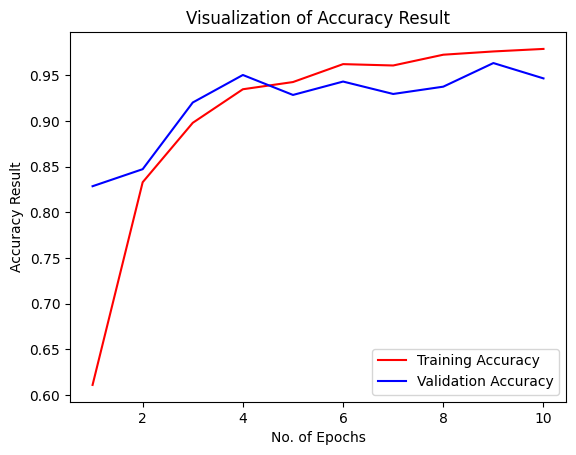

In [44]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [46]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [49]:
test_set = tf.keras.utils.image_dataset_from_directory(
    "C:\\Users\\There\\OneDrive\\Desktop\\Krishi Vaidhya\\IIIT Sri City\\Plant_Disease_Prediction-20250228T074143Z-001\\Plant_Disease_Prediction\\Plant_Disease_Dataset\\Plant_Disease_Dataset\\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 3750 files belonging to 38 classes.


In [50]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

118/118 ━━━━━━━━━━━━━━━━━━━━ 13s 108ms/step


(array([[9.9578154e-01, 8.6980535e-06, 2.6422163e-11, ..., 2.4687282e-11,
         2.1200177e-11, 5.3742074e-08],
        [9.9995744e-01, 4.7505805e-06, 3.9339719e-11, ..., 5.2952091e-12,
         7.4196248e-12, 9.7624520e-10],
        [8.9822847e-01, 9.8521151e-03, 4.6857269e-07, ..., 1.1614104e-07,
         1.4006933e-07, 8.7556524e-05],
        ...,
        [6.4272392e-09, 2.6143540e-12, 4.3298880e-15, ..., 9.6361104e-16,
         5.9086227e-15, 9.9999976e-01],
        [5.5937090e-07, 3.5192783e-11, 2.8595466e-13, ..., 2.6451411e-14,
         1.1833285e-13, 9.9999893e-01],
        [2.0842655e-16, 1.3903474e-19, 8.7056237e-26, ..., 2.0549575e-26,
         4.3481239e-25, 1.0000000e+00]], dtype=float32),
 (3750, 38))

In [51]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [52]:
predicted_categories

<tf.Tensor: shape=(3750,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

In [53]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(3750, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [54]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(3750,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37], dtype=int64)>

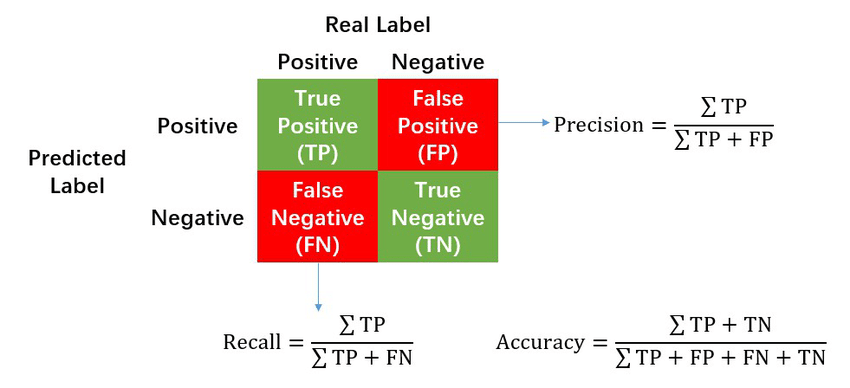

In [55]:
from sklearn.metrics import classification_report,confusion_matrix

In [56]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

ValueError: Number of classes, 17, does not match size of target_names, 38. Try specifying the labels parameter

In [57]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[123,   2,   3,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0, 112,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [ 13,   7, 466,   1,   0,   0,   0,   0,   1,   0,   2,   0,   0,
          0,   0,   0,  12],
       [  2,   2,  13, 296,   0,   0,   0,   0,   2,   0,   0,   0,   0,
          0,   0,   0,   1],
       [  0,   0,   0,   0, 476,   0,   1,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   0,   0,   3,   5,   0,   0,   0,   1,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   1,   0,   0,   0, 248,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   3,  76,   0,   2,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   4,   0,   0,   0,   0,   0,  71,   0,   0,   0,   0,
          0,   0,   0,   0],
       [  0,   0,   3,   0,   0,   0,   0,   0,   0, 306,   0,   1,   0,
         

### Confusion Matrix Visualization

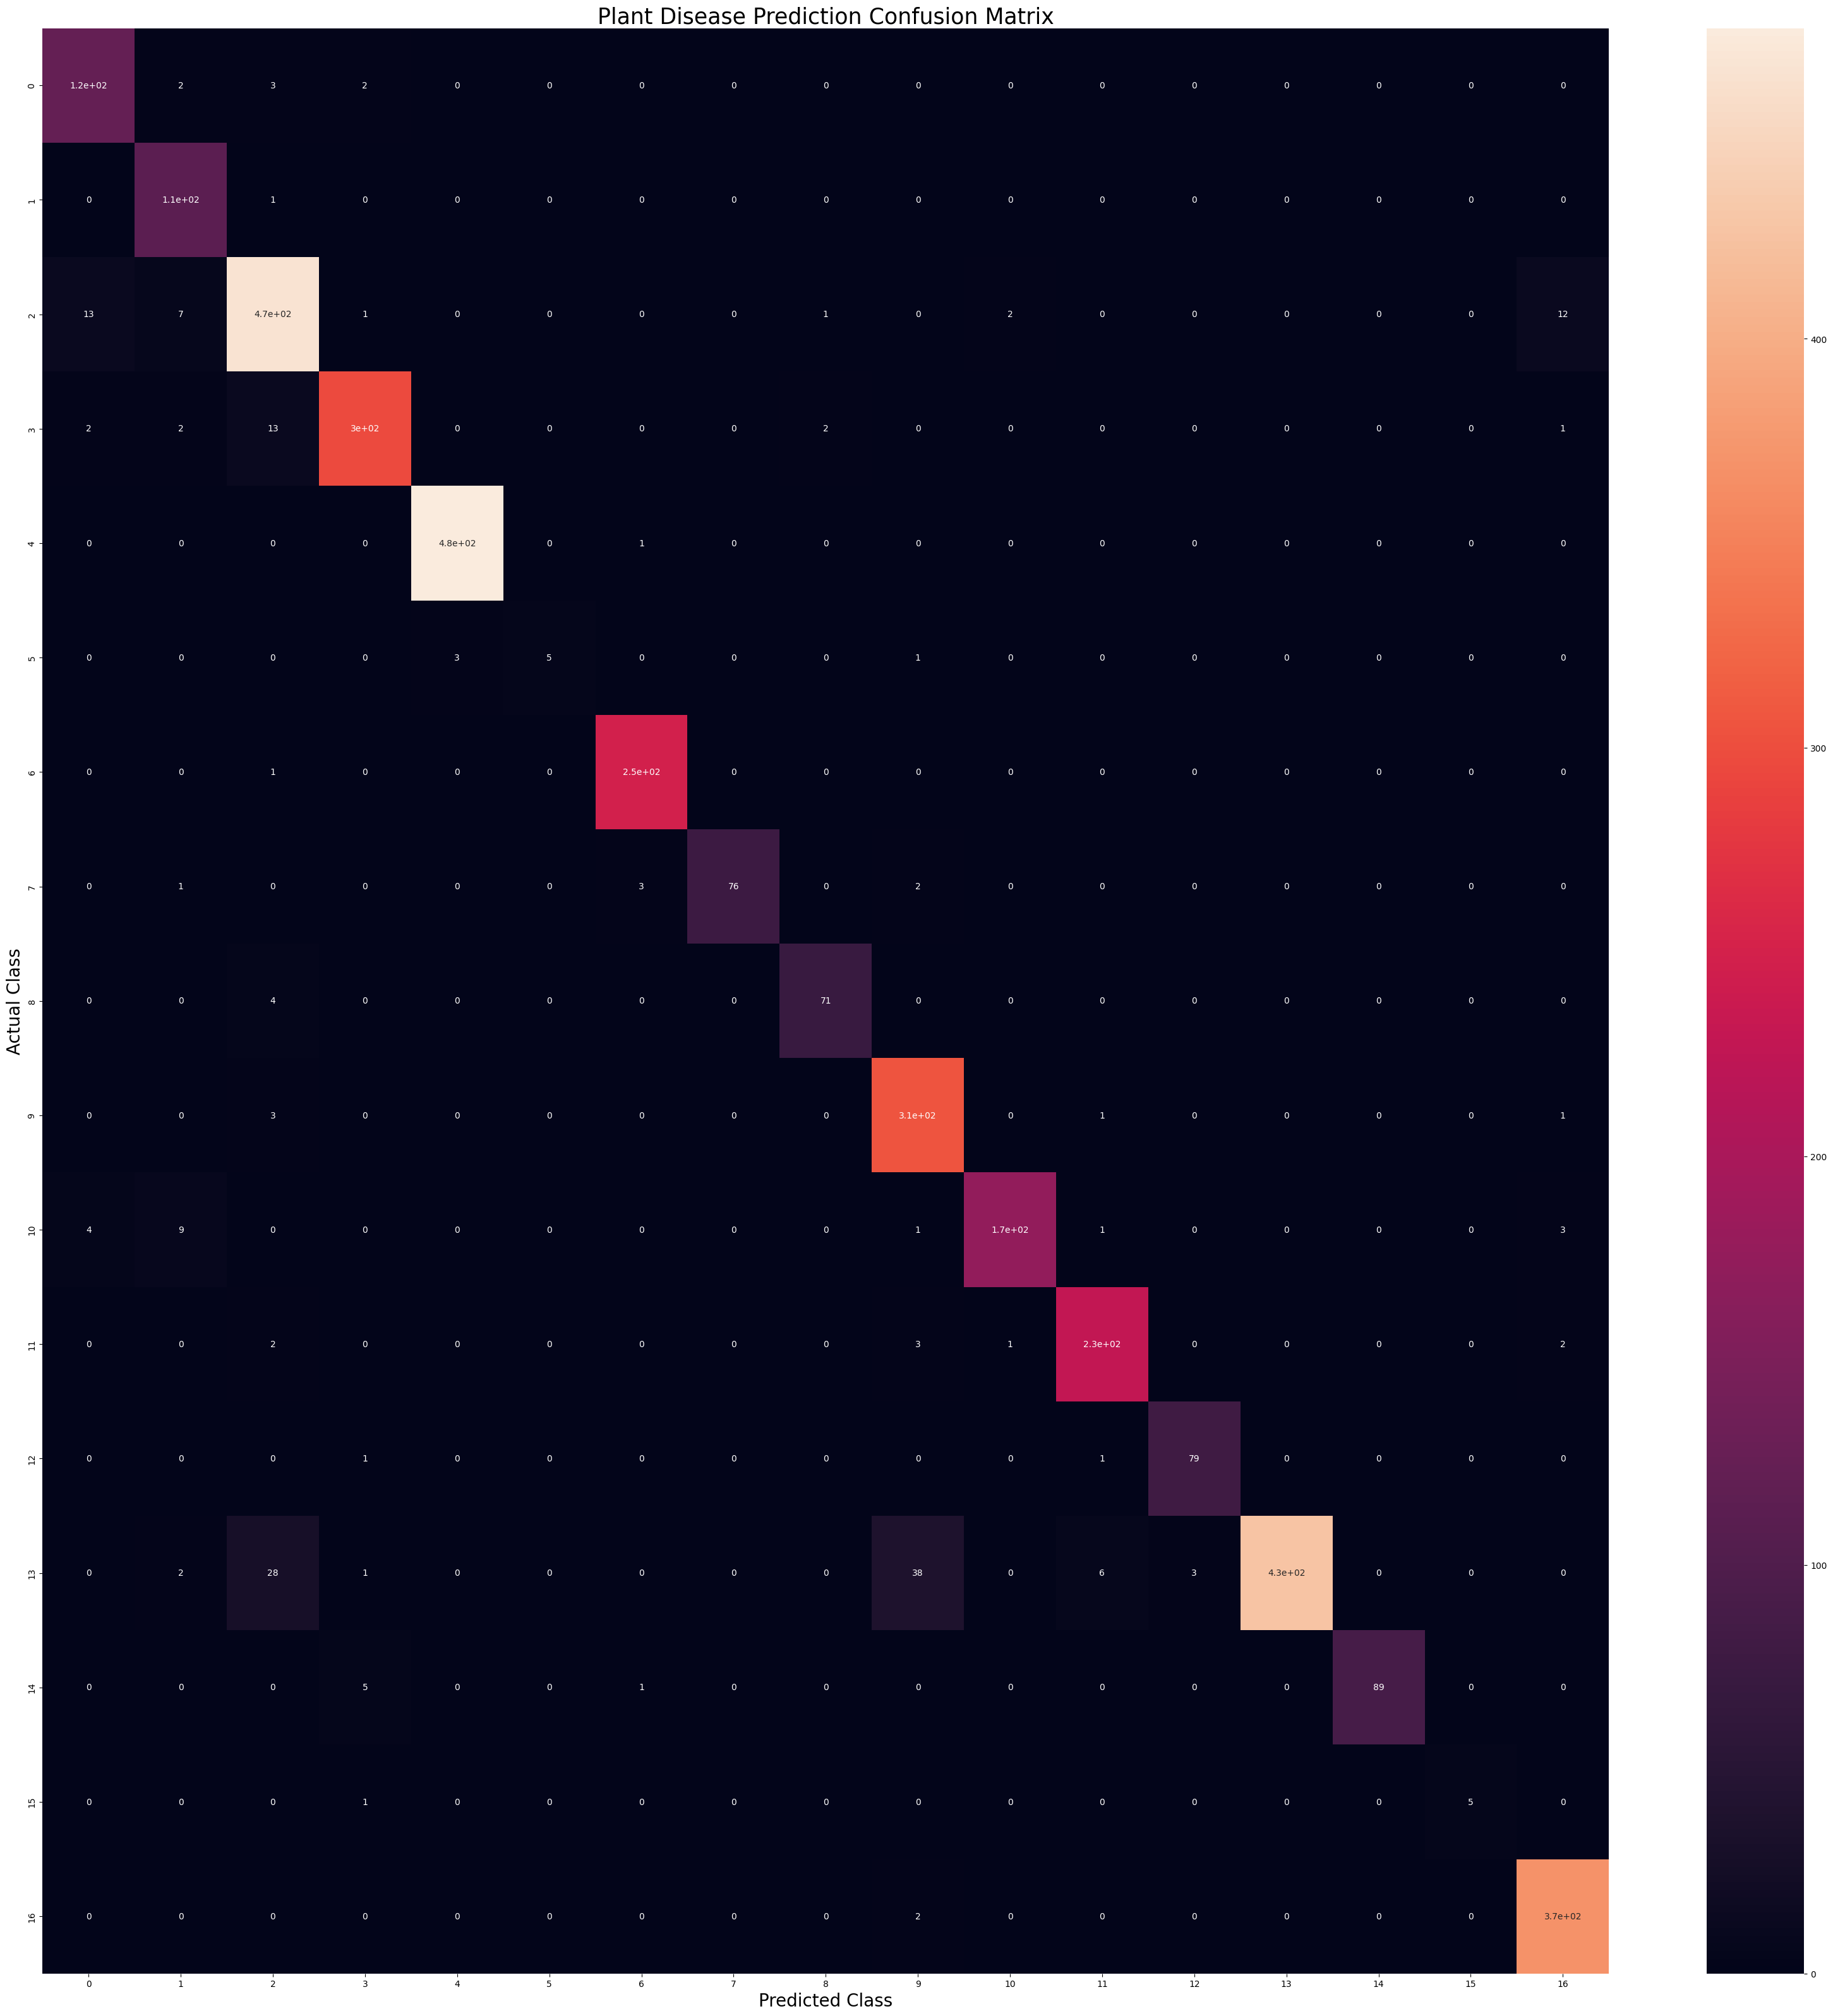

In [58]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()